In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

C:\Users\USUARIO\anaconda3\envs\IDSA37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


# Generación de datos

In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del Dataset

Dos tipos de datasets:
- generate_gaussians_distributions: Generado con dos gaussianas
- generate_elipse_data: Generado con distribución uniforme en el cuadrado [-1, 1], [-1, 1] y recortando con una elipse en el centro

Descomentar/comentar las lineas correspondientes para seleccionar uno u otro dataset

In [6]:
X, y = generate_gaussians_distributions()
# X, y = generate_elipse_data()

# Problema 1: Graficamos

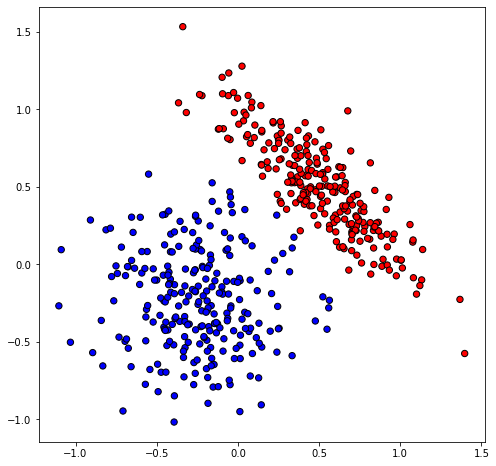

In [7]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing=1e-09 (Ambos datasets)
- priors=None, var_smoothing=0.2 (para generate_elipse_data) var_smoothing=1 (para generate_gaussians_distributions) 
- priors=[0.5, 0.5] (para generate_elipse_data) priors=[0.7, 0.3] (para generate_gaussians_distributions), var_smoothing=1e-09 

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True (Ambos modelos)
- Cambio los parámetros como quiera y verifique si ocurre lo esperado

In [8]:
model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)

In [9]:
# Entrenamiento del modelo
model.fit(X,y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [10]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

In [11]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_

[0. 1.]


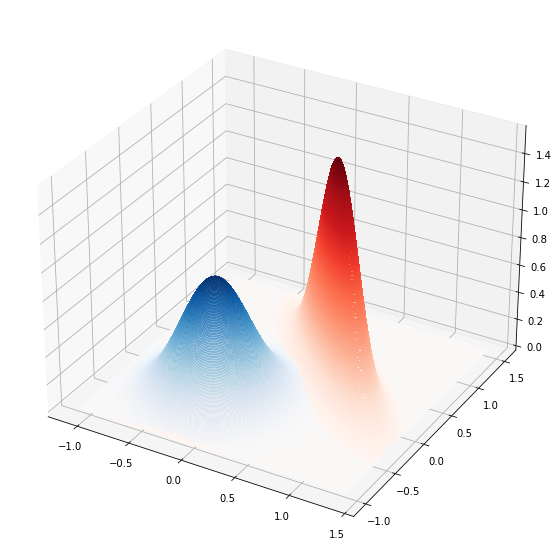

In [12]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

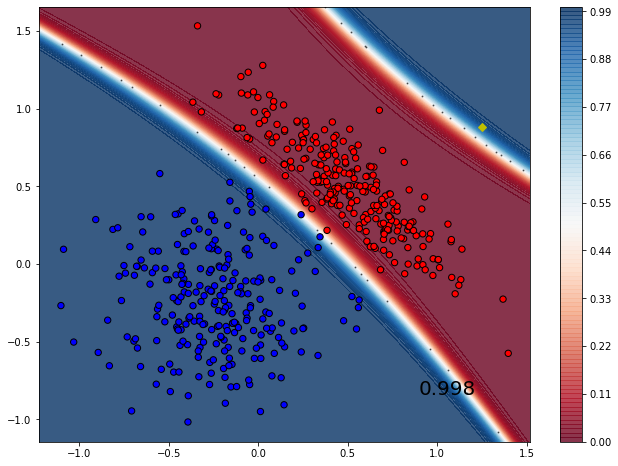

In [13]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

#Problema 4
x1=1.25
y1=0.88
plt.plot(x1,y1,"yD") # Por convención primero es X, luego y (X,y)

# Pregunta 1:
## De acuerdo a los sataset graficados podemos comprobar que las siguientes afirmaciones son correctas:
#### El dataset: generate_gaussians_distributions(), es linealmente separable
#### Es de esperar que QDA tenga una mejor performance en generate_elipse_data() que Naive Bayes
#### generate_elipse_data() genera datos uniformente distribuidos y asigna clase azul a aquellas observaciones que quedan dentro de una elipse.

# Problema 3

#### Accuracy para QDA refierido al dataset generate_gaussians_distributions():

In [14]:
print(score)

0.998


# Problema 4 
#### La mejora de performance de QDA sobre Naive Bayes se debe a que el dataset fue generado con una de las Gaussianas no independiente.
#### Un modelo generativo es un buen modelo para este dataset
#### La razón por la que queda una franja en el caso de QDA es por el hecho que la distribución de los azules cae mas lento que la de los rojos


Todas estas afirmaciones son correctas

### Es más probable que un punto azul caiga en (1.25, 0.88) que uno rojo para QDA
Si Graficamos: plt.plot(x1=1.25,y1=0.88,"yD") - Vemos que esta Afirmación es Verdadera